In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
SMP=pd.read_csv('S&P500_Stock_Data.csv')

In [3]:
SMP

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [4]:
SMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Interest Rates    1000 non-null float64
Employment        1000 non-null float64
S&P 500 Price     1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
SMP.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [6]:
SMP.head(6)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909


In [7]:
SMP.tail(5)

,Interest Rates,Employment,S&P 500 Price
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


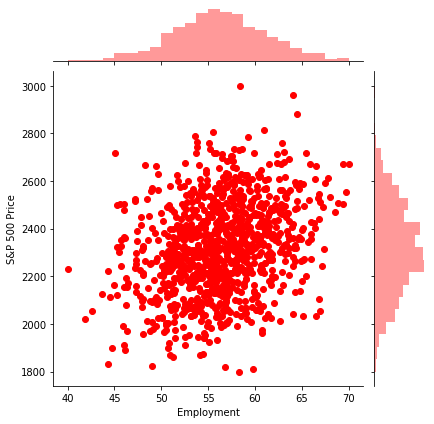

In [8]:
sns.jointplot(x='Employment',y='S&P 500 Price',data=SMP,color='red')

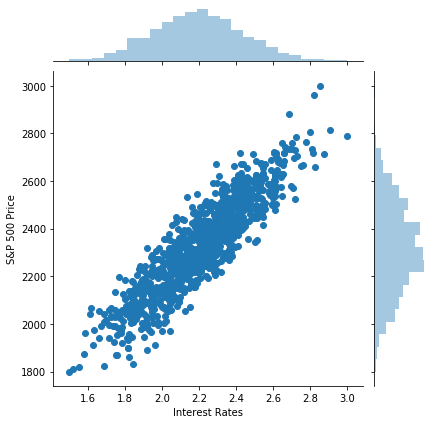

In [9]:
sns.jointplot(x='Interest Rates',y='S&P 500 Price',data=SMP)

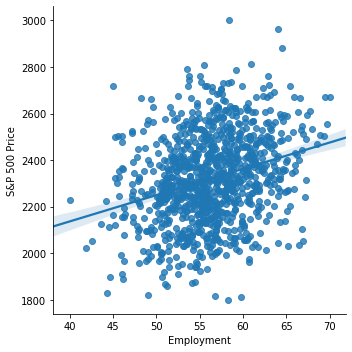

In [10]:
sns.lmplot(x='Employment',y='S&P 500 Price',data=SMP)

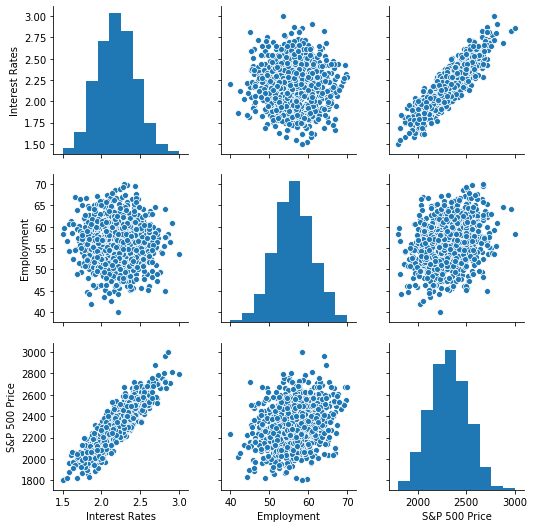

In [11]:
sns.pairplot(SMP)

In [12]:
y= SMP['S&P 500 Price']

In [13]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [14]:
X= SMP[['Interest Rates','Employment']]

In [15]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=(0.20))

In [17]:
X_train.shape

(800, 2)

In [18]:
X_test.shape

(200, 2)

In [19]:
y_train.shape

(800,)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor=LinearRegression(fit_intercept=True)

In [22]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('Linear model Coefficient',regressor.coef_)
print("Linear model Coefficient",regressor.intercept_)

Linear model Coefficient [731.55399798  12.33175912]
Linear model Coefficient 20.51248065470054


In [24]:
results = sn.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          S&P 500 Price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.903e+05
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:38:26   Log-Likelihood:                         -4418.2
No. Observations:                 800   AIC:                                      8840.
Df Residuals:                     798   BIC:                                      8850.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Interest Rates   735.2016      6.990    105.175      0.000     721.480     748.923
Employment        12.5523      0.274     45.827      0.000      12.015      13.090
==============================================================================
Omnibus:                        2.433   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.333
Skew:                           0.079   Prob(JB):                        0.311
Kurtosis:                       2.787   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
y_predict=regressor.predict(X_test)

In [26]:
#y_predict

In [27]:
y_test

258    2479.378679
704    2403.345743
554    2072.532283
270    2175.005338
638    2378.590709
          ...     
840    2502.225437
608    2320.415035
199    2561.397750
413    2540.832079
901    2243.020143
Name: S&P 500 Price, Length: 200, dtype: float64

Score: 0.8961254664773475


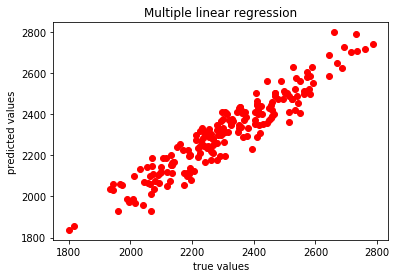

In [28]:
plt.scatter(y_test,y_predict,color='red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Multiple linear regression")
print('Score:', regressor.score(X_test, y_test))

In [29]:
k=X_test.shape[1]
n=len(X_test)

In [30]:
n

200

In [31]:
k

2

In [32]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from math import sqrt

RMSE=float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))

In [33]:
print('RMSE=',RMSE)

RMSE= 62.01


In [34]:
MSE=mean_squared_error(y_test,y_predict)

In [35]:
print('MSE= ',MSE)

MSE=  3845.2071770610532


In [36]:
MAE=mean_absolute_error(y_test,y_predict)

In [37]:
print('MAE=',MAE)

MAE= 50.56801683929503


In [38]:
r2=r2_score(y_test,y_predict)
print('r2=',r2)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
print('\n adj_r2=',adj_r2)

r2= 0.8961254664773475

 adj_r2= 0.8950709026852394


In [39]:
MAPE=np.mean( np.abs((y_test-y_predict)/ y_test))*100

In [40]:
print('Mean_absolute percentage error =',MAPE)

Mean_absolute percentage error = 2.2086096787708627


In [41]:
from mpl_toolkits.mplot3d import Axes3D

In [42]:
x_surf,y_surf= np.meshgrid ( np.linspace(SMP['Interest Rates'].min(),SMP['Interest Rates'].max(),100),  ( np.linspace(SMP['Employment'].min(),SMP['Employment'].max(),100)))

In [43]:
x_surf.shape

(100, 100)

In [44]:
onlyX=pd.DataFrame({'Interest Rates': x_surf.ravel(),'Employment':y_surf.ravel()})

In [45]:
onlyX.shape

(10000, 2)

In [46]:
fitted_Y=regressor.predict(onlyX)

In [47]:
fitted_Y.shape

(10000,)

In [48]:
fitttedY=fitted_Y.reshape(x_surf.shape)

In [49]:
fitttedY.shape

(100, 100)

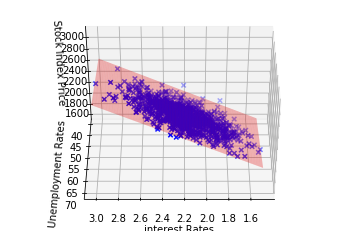

In [50]:
fig=plt.figure()
ax= fig.add_subplot(111,projection='3d')
ax.scatter(SMP['Interest Rates'], SMP['Employment'], SMP['S&P 500 Price'],color='blue', marker='x') 
ax.plot_surface(x_surf,y_surf,fitttedY,color='r',alpha=0.3)
ax.set_xlabel('interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')
ax.view_init(40,90)
plt.show()

In [51]:
coeff_df=pd.DataFrame(regressor.coef_, X.columns,columns=['coefficients'])
coeff_df

,coefficients
Interest Rates,731.553998
Employment,12.331759
